<a href="https://colab.research.google.com/github/ahanaacharjee23/pds-11.python/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


def load_dataset(url):
    print('Task 1:')
    try:
        df = pd.read_csv(url)
        print("Dataset loaded successfully!")
        print(df.head())

        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def find_null_features(df):
    print('Task 2:')

    null_features = df.columns[df.isnull().any()].tolist()
    print(f"Features with null values: {null_features}")
    return null_features


In [ ]:
def fill_null_values(df):
    try:
        print('Task 3:')

        if 'Age' in df.columns:
            age_mean = df['Age'].mean()
            df['Age'] = df['Age'].fillna(age_mean)  # Explicit assignment
            print(f"Filled null values in 'Age' with mean: {age_mean}")
        if 'Cabin' in df.columns:
            df['Cabin'] = df['Cabin'].fillna('Unknown')  # Explicit assignment
            print("Filled null values in 'Cabin' with 'Unknown'")
        return df
    except Exception as e:
        print('Something went wrong while filling null values')



In [ ]:
def plot_survival(df):
    try:
        print('Task 4 is showing on the Chart window:')

        survived = df[df['Survived'] == 1]
        dead = df[df['Survived'] == 0]

        male_survived = survived[survived['Sex'] == 'male'].shape[0]
        female_survived = survived[survived['Sex'] == 'female'].shape[0]

        male_dead = dead[dead['Sex'] == 'male'].shape[0]
        female_dead = dead[dead['Sex'] == 'female'].shape[0]

        labels = ['Survived', 'Dead']
        male_counts = [male_survived, male_dead]
        female_counts = [female_survived, female_dead]

        x = range(len(labels))
        plt.bar(x, male_counts, width=0.4, label='Male', align='center', color='blue')
        plt.bar(x, female_counts, width=0.4, label='Female', align='edge', color='pink')
        plt.xticks(x, labels)
        plt.xlabel('Outcome')
        plt.ylabel('Count')
        plt.title('Task 4: Survival Analysis by Gender')
        plt.legend()
        plt.show()
    except Exception as e:
        print('Something went wrong while plotting the survival data for both Male and Female')



In [ ]:
def plot_survival_pclass(df):
    try:
        print('Task 5 is showing on the Chart window:')

        pclass_survived = df[df['Survived'] == 1].groupby('Pclass').size()
        pclass_dead = df[df['Survived'] == 0].groupby('Pclass').size()

        labels = ['Class 1', 'Class 2', 'Class 3']
        x = range(len(labels))
        plt.bar(x, pclass_survived, width=0.4, label='Survived', align='center', color='green')
        plt.bar(x, pclass_dead, width=0.4, label='Dead', align='edge', color='red')
        plt.xticks(x, labels)
        plt.xlabel('Passenger Class')
        plt.ylabel('Count')
        plt.title('Task 5: Survival Analysis by Passenger Class')
        plt.legend()
        plt.show()
    except Exception as e:
        print('Something went wrong while plotting the survival data by Passenger Class')



In [ ]:
def create_age_class(df):
    try:
        print('Task 6:')
        bins = [0, 16, 26, 36, 62, float('inf')]
        labels = [0, 1, 2, 3, 4]
        df['AgeClass'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
        print("Created 'AgeClass' column:")
        print(df[['Age', 'AgeClass']].head())
        return df
    except Exception as e:
        print('Something went wrong while creating the AgeClass column')



In [ ]:
def drop_age_column(df):
    try:
        print('Task 7:')
        df = df.drop(columns=['Age'])
        print("Dropped 'Age' column.")
        return df
    except Exception as e:
        print('Something went wrong while dropping the Age column')



Task 1:
Dataset loaded successfully!
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0          

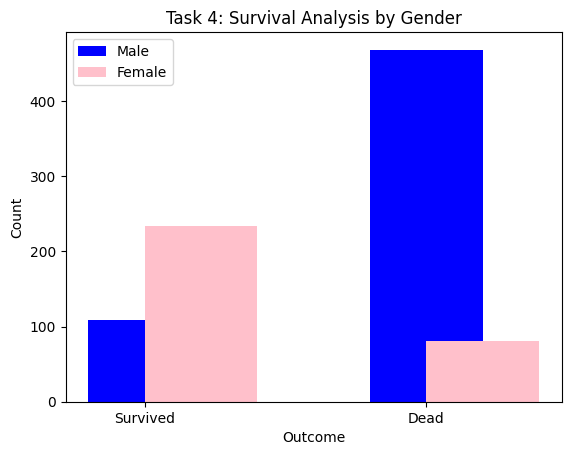

Task 5 is showing on the Chart window:


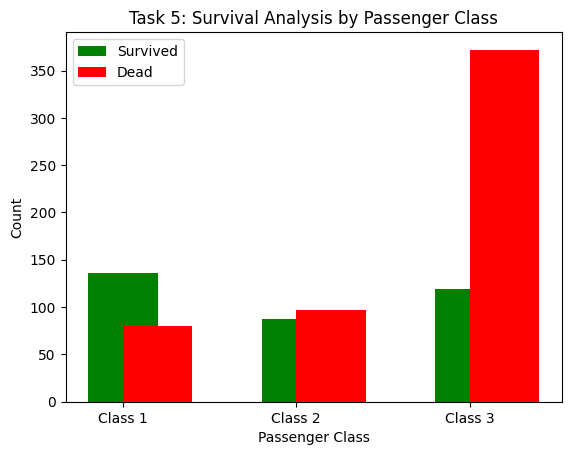

Task 6:
Created 'AgeClass' column:
    Age AgeClass
0  22.0        1
1  38.0        3
2  26.0        2
3  35.0        2
4  35.0        2
Task 7:
Dropped 'Age' column.
Task 8 is showing on the Chart window:


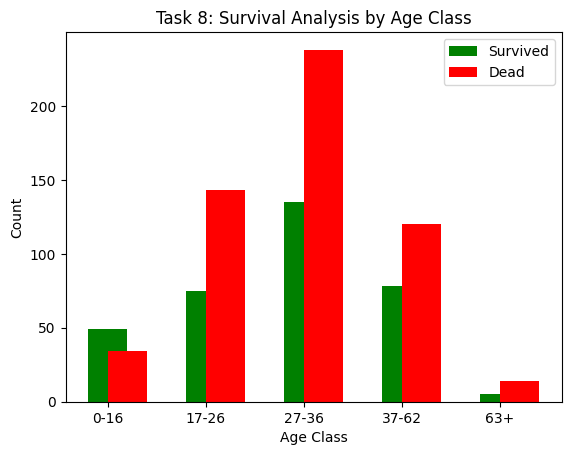

In [ ]:
def plot_survival_ageclass(df):
    try:
        print('Task 8 is showing on the Chart window:')

        # Explicitly set observed=False to silence the warning
        ageclass_survived = df[df['Survived'] == 1].groupby('AgeClass', observed=False).size()
        ageclass_dead = df[df['Survived'] == 0].groupby('AgeClass', observed=False).size()


        labels = ['0-16', '17-26', '27-36', '37-62', '63+']
        x = range(len(labels))
        plt.bar(x, ageclass_survived, width=0.4, label='Survived', align='center', color='green')
        plt.bar(x, ageclass_dead, width=0.4, label='Dead', align='edge', color='red')
        plt.xticks(x, labels)
        plt.xlabel('Age Class')
        plt.ylabel('Count')
        plt.title('Task 8: Survival Analysis by Age Class')
        plt.legend()
        plt.show()
    except Exception as e:
        print('Something went wrong while plotting the survival data by Age Class')

if __name__ == "__main__":
    dataset_url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"

    # Task 1: Load dataset
    df = load_dataset(dataset_url)
    if df is not None:
        # Task 2: Find null features
        find_null_features(df)

        # Task 3: Fill null values
        df = fill_null_values(df)

        # Task 4: Plot survival data by gender
        plot_survival(df)

        # Task 5: Plot survival data by passenger class
        plot_survival_pclass(df)

        # Task 6: Create 'AgeClass' column
        df = create_age_class(df)

        # Task 7: Drop the 'Age' column
        df = drop_age_column(df)

        # Task 8: Plot survival data by AgeClass
        plot_survival_ageclass(df)